# Take home exam, The Watts-Strogatz experiment
## COMP 215, Spring 2023, Joseph Fall


#### Author: Shayan Heidari
#### Last Modified: 21 April 2023

The Erdos-Enyi model doesn't include clustering in its thesis.

The clustering in this model is based on p.

In the experiment, we start off with a ring lattice and randomly rewire links. The random connections lower the path between any opposing nodes which by default, in the ring lattice, have the longest travel path.

Therefore we also don't need many random paths to shorten travel distance.

### The purpose of this notebook is to Prove the clustering and path length between random graphs and regular graphs
Heavily inspired by the Complex notebook

#### Clustering Coefficient:
A term defined by WS that quantifies the likelihood that two nodes that are connected to the same node are also connected to each other.

#### Path length:
A measure of the average distance between two nodes, which corresponds to the degrees of separation in a social network.

Watts and Strogratz's experiment is a model of a system with low path lengths and high clustering and short path lengths. Just like a social media.

This is done by starting off with a regular graph with `n` nodes and each node connected to `k` number of neighbors. and then randomly replace some default edges with random ones with the probability of p.

In [1]:
import random, numpy as np, networkx as nx, time, matplotlib.pyplot as plt
from dataclasses import dataclass

#### Here's a "Social Network" class which provides all the methods necessary to build a lattice, then rewire to slowly make a WS graph

In [106]:
@dataclass
class SocialNetwork:
    # Size
    n: int
    # Neighbors
    k: int
    # Probability of reconnecting. 
    # Very low values cause social networks.
    p: int
        
    def makeRingLattice(self):
        nodes = range(self.n)
        
        self.graph = nx.Graph()
        
        self.graph.add_nodes_from( nodes )
        self.graph.add_edges_from( self.adjacent_edges(nodes, self.k//2) )
        return self.graph
    
    def adjacent_edges(self, nodes, halfk):
        '''
            Yields edges between each node and `halfk` neighbors.
        '''
        n = len(nodes)
        for i, u in enumerate(nodes):
            for j in range(i+1, i+halfk+1):
                v = nodes[j % n]
                yield u, v
                
    
    def rewire(self, G):
        '''
            Rewire random edges in our graph. 
        '''
        nodes = set(G)
        for u, v in G.edges():
            if (np.random.random() < self.p):
                choices = nodes - {u} - set(G[u])
                new_v = np.random.choice(list(choices))
                G.remove_edge(u, v)
                G.add_edge(u, new_v)
                
                
    def makeWSGraph(self):
        self.ws = self.makeRingLattice()
        self.rewire(self.ws)
        
    def draw(self):
        nx.draw_circular(g.ws)


# Problem:
## Find the sweetspot for shortest travel distance and highest clustering.

From WS experiments, this can be found by testing different values of p, the probability of a new random edge to replace a default lattice one.

In [139]:
cluster_hist = []
for i in np.arange(0.01, 0.1, 0.01):
    g = SocialNetwork(10, 4, 0.2)
    g.makeWSGraph()
    c = nx.average_clustering(g.ws)
    print(c)
    print(i)
    cluster_hist.append(c)

0.39333333333333326
0.01
0.5066666666666667
0.02
0.29
0.03
0.49000000000000005
0.04
0.5566666666666665
0.05
0.32666666666666666
0.060000000000000005
0.5733333333333334
0.06999999999999999
0.4733333333333333
0.08
0.4066666666666666
0.09


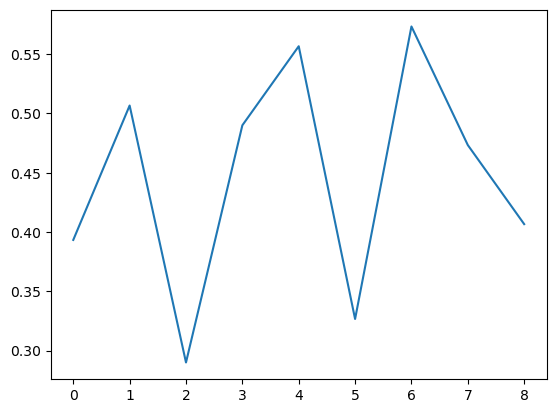

In [144]:
plt.plot(cluster_hist)